In [1]:
from networkx.algorithms import bipartite
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import random
import numpy as np
from statistics import mean
import itertools as it
seed = 25
df:pd.DataFrame = pd.read_csv('organization.csv')
df = df[df['member']!= 'None']
G=nx.Graph()
G.add_nodes_from(df['Organisation'],bipartite=0)
G.add_nodes_from(df['member'],bipartite=1)

for i in range(len(df)):
  G.add_edges_from([(df.iloc[i,1],df.iloc[i,0])])


def draw(G, pos, measures, measure_name):
    #sizes = np.fromiter(measures.values(), float)
    nodes = nx.draw_networkx_nodes(G, pos, node_size=200, cmap=plt.cm.plasma,
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

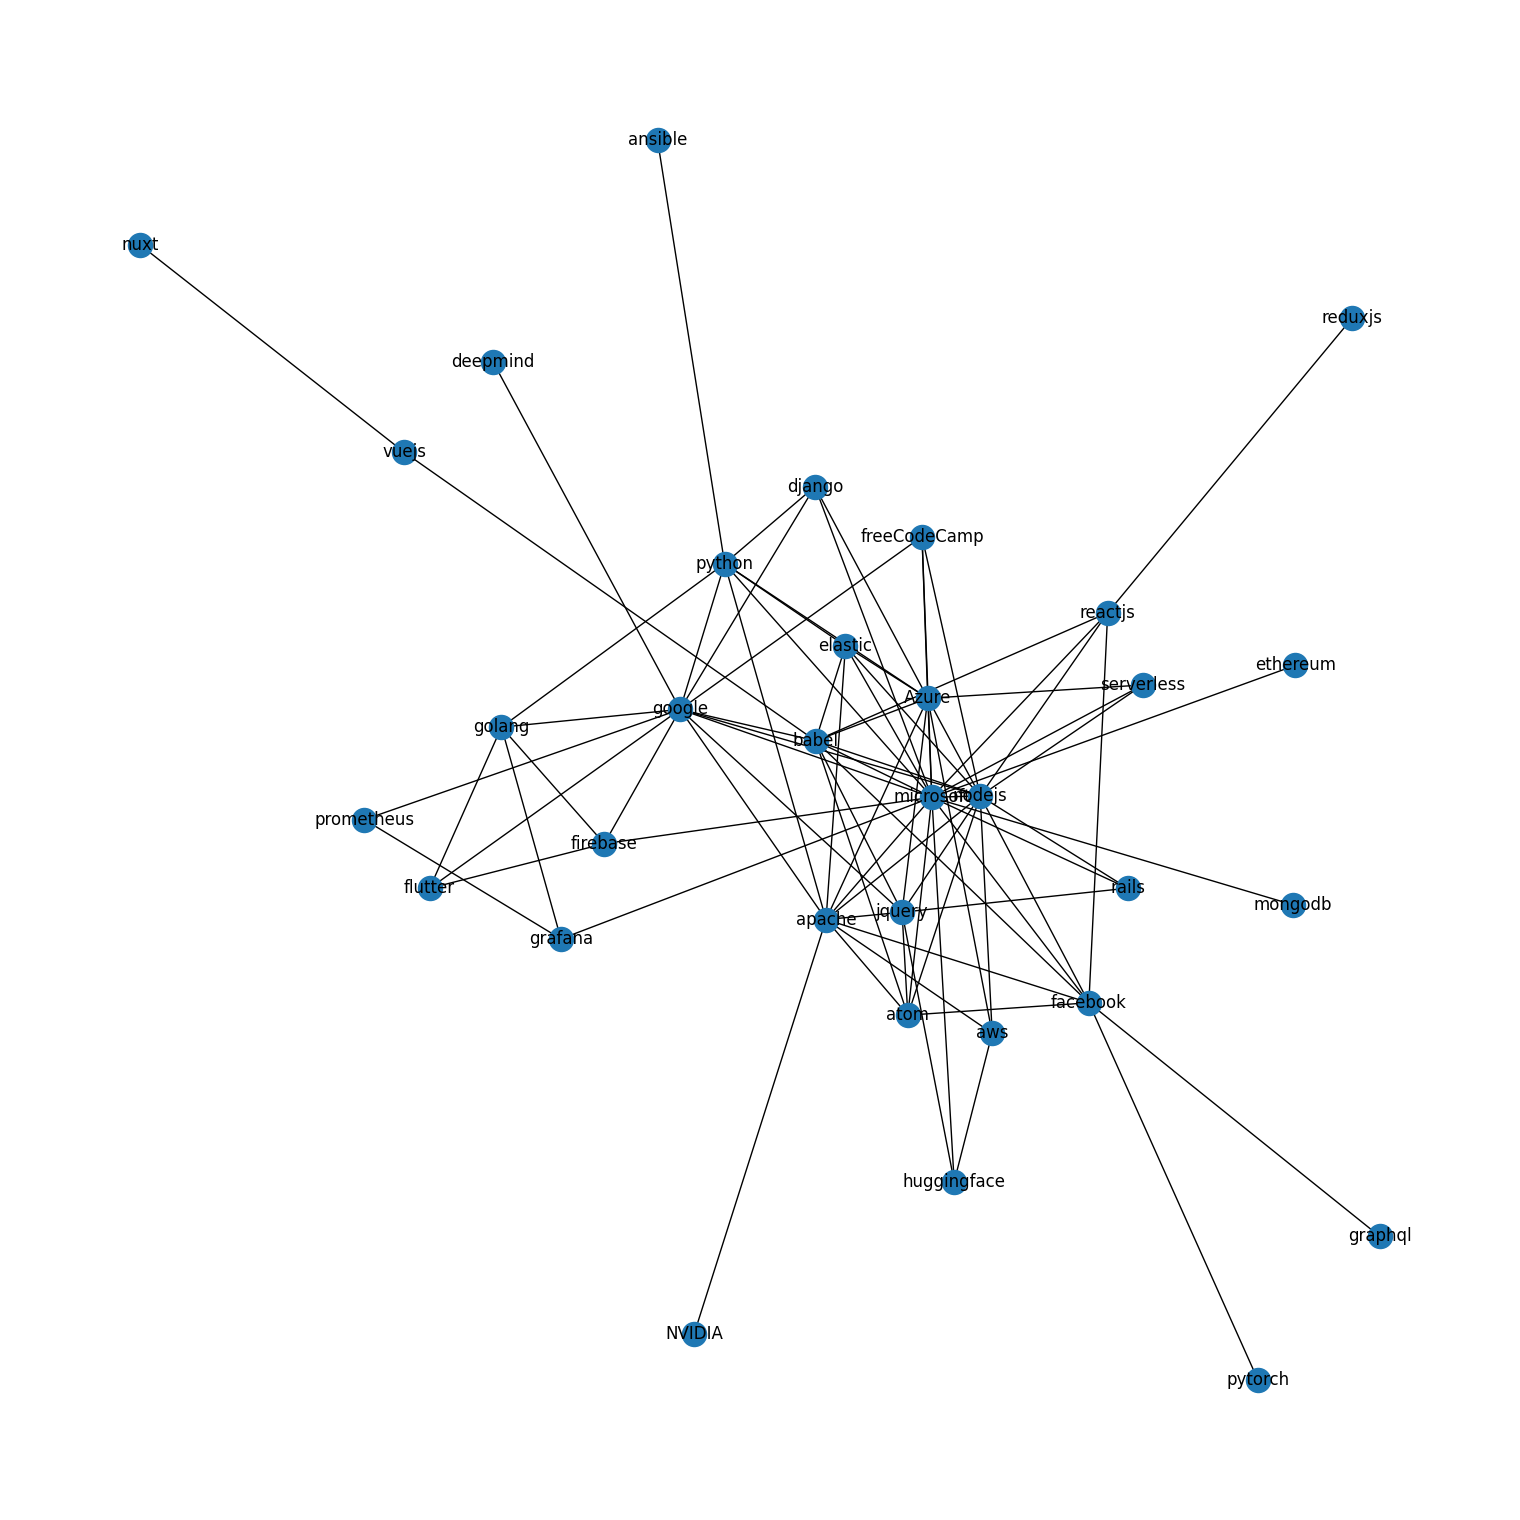

In [2]:
df_company = df.merge(df,on='member')
df_company = df_company[['Organisation_x','Organisation_y']]
df_company = df_company[df_company['Organisation_x']!=df_company['Organisation_y']]
df_company = df_company.drop_duplicates(ignore_index=True)
df_company = df_company.loc[pd.DataFrame(np.sort(df_company, axis=1), index=df_company.index).drop_duplicates().index]
G_company = nx.Graph()
G_company = nx.from_pandas_edgelist(df_company, 'Organisation_x', 'Organisation_y')
pos_company = nx.spring_layout(G_company, seed=seed)
plt.figure(figsize=(15,15))
nx.draw(G_company, with_labels = True, pos=pos_company)
plt.show()

In [3]:
conn_comp = max(nx.connected_components(G),key=len)
G = G.subgraph(conn_comp)
pos=nx.spring_layout(G, seed=seed)

# Data Visualization

In [ ]:
pos_complete=nx.spring_layout(G,seed=seed)

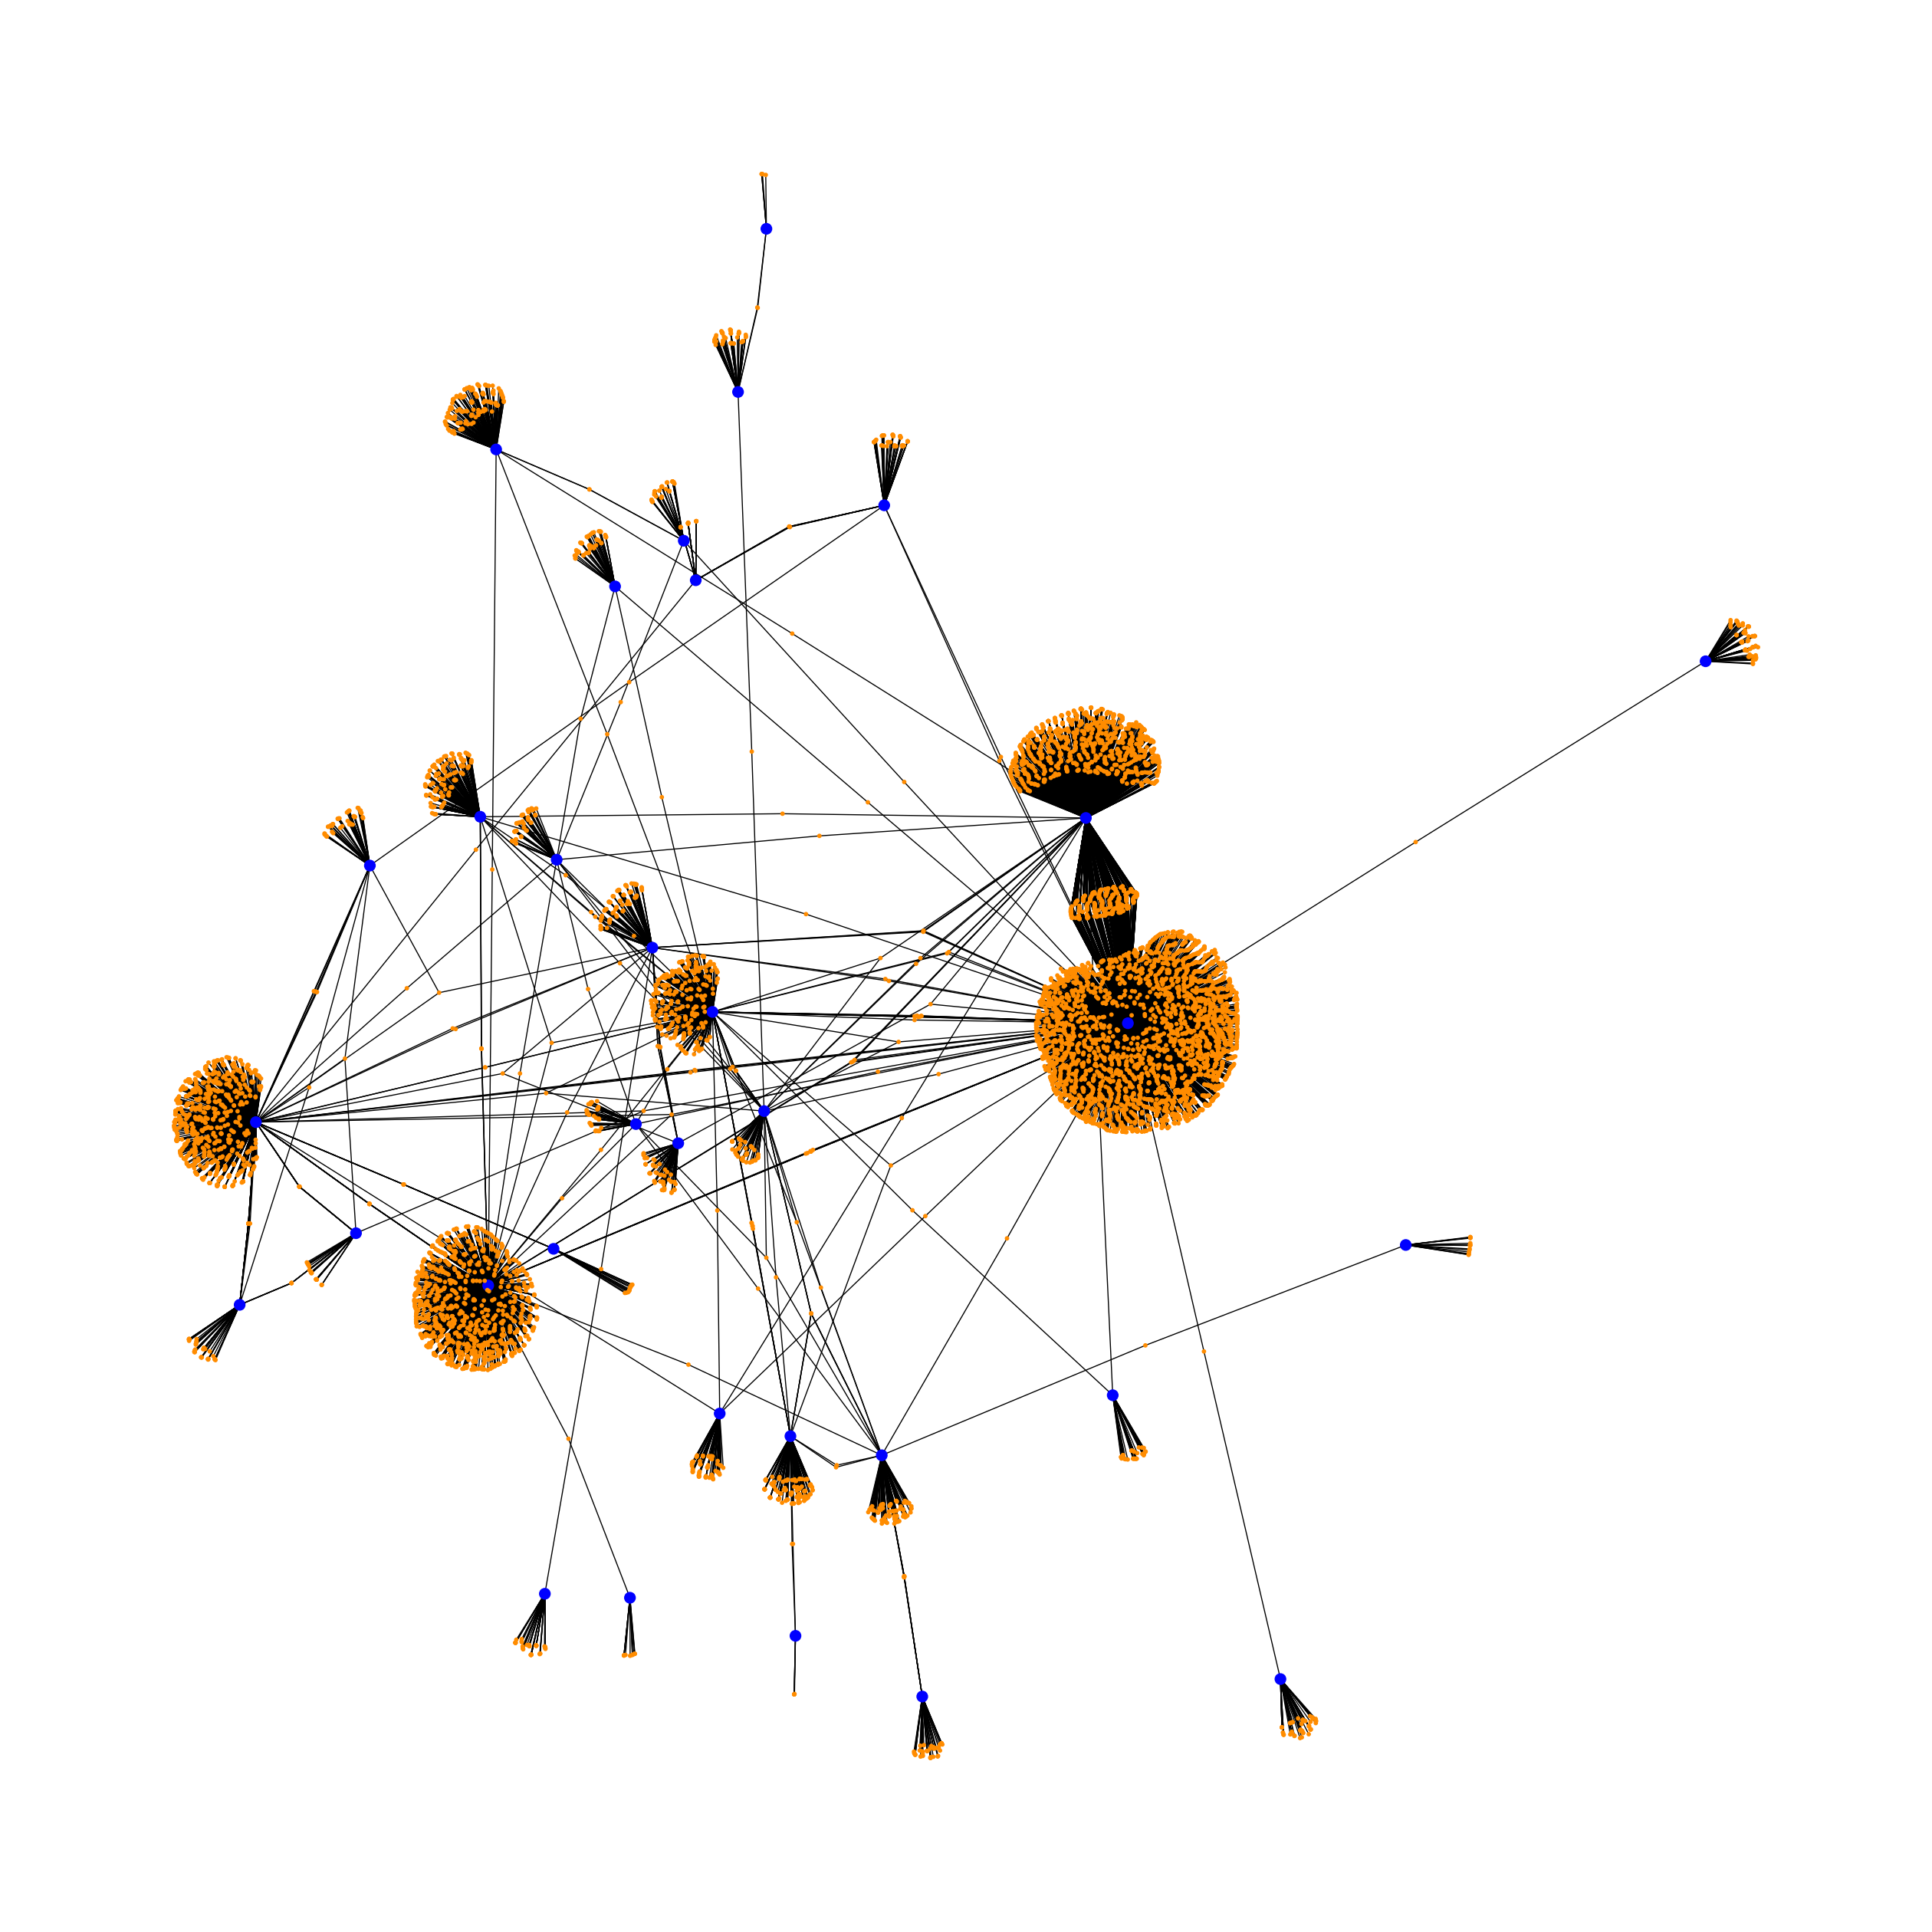

In [ ]:
color_map=[]
node_size_map=[]
for node in G.nodes:
  if node in set(df['Organisation']):
    color_map.append('blue')
    node_size_map.append(100)
  else:
    color_map.append('darkorange')
    node_size_map.append(10)


# nx.draw(B,with_labels=1)
plt.figure(figsize=(25,25))
nx.draw(G, pos=pos, node_color= color_map, node_size=node_size_map)
plt.show()

In [ ]:
print(f'Nodes: {len(G.nodes)}')
print(f'Edges: {len(G.edges)}')

Nodes: 8800
Edges: 9518


In [6]:
def draw(G, pos, measures, measure_name):
    #sizes = np.fromiter(measures.values(), float)
    plt.figure(figsize=(12,12))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=100, cmap=plt.cm.plasma,
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')

# Calcolo delle metriche di centralità

## Betweenness Centrality

In [ ]:
bet = nx.betweenness_centrality(G)

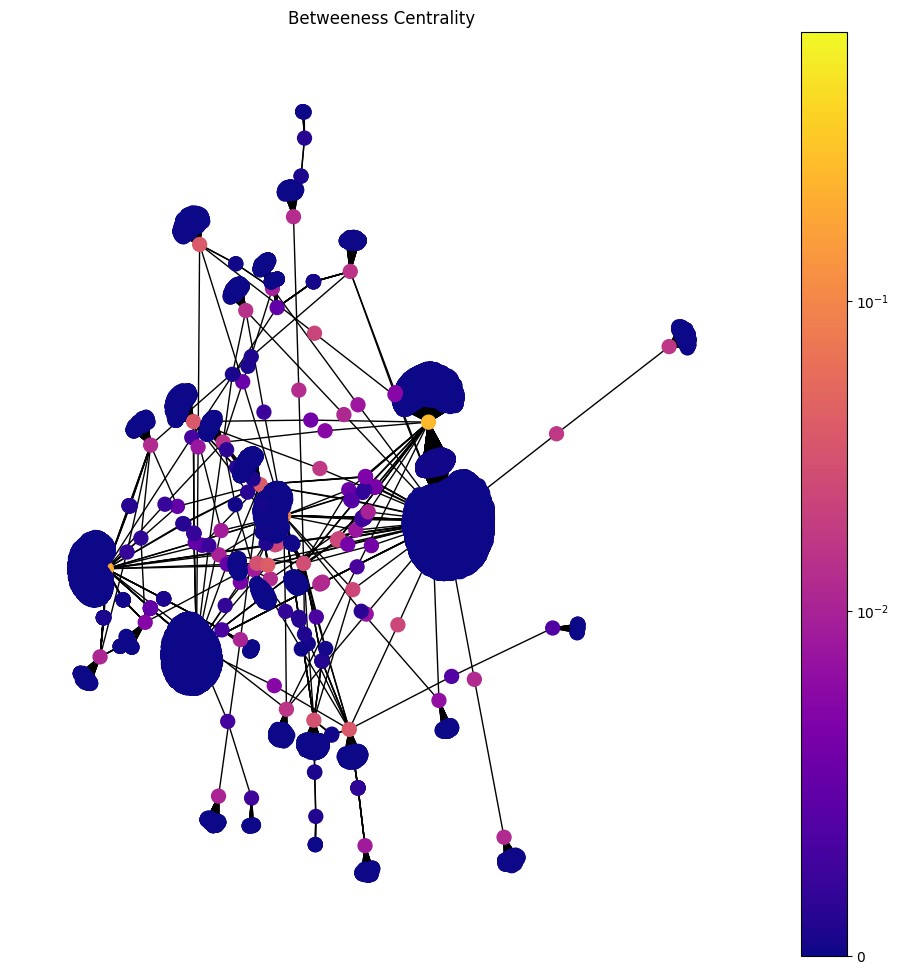

In [ ]:
draw(G, pos, bet, 'Betweeness Centrality')

<Axes: >

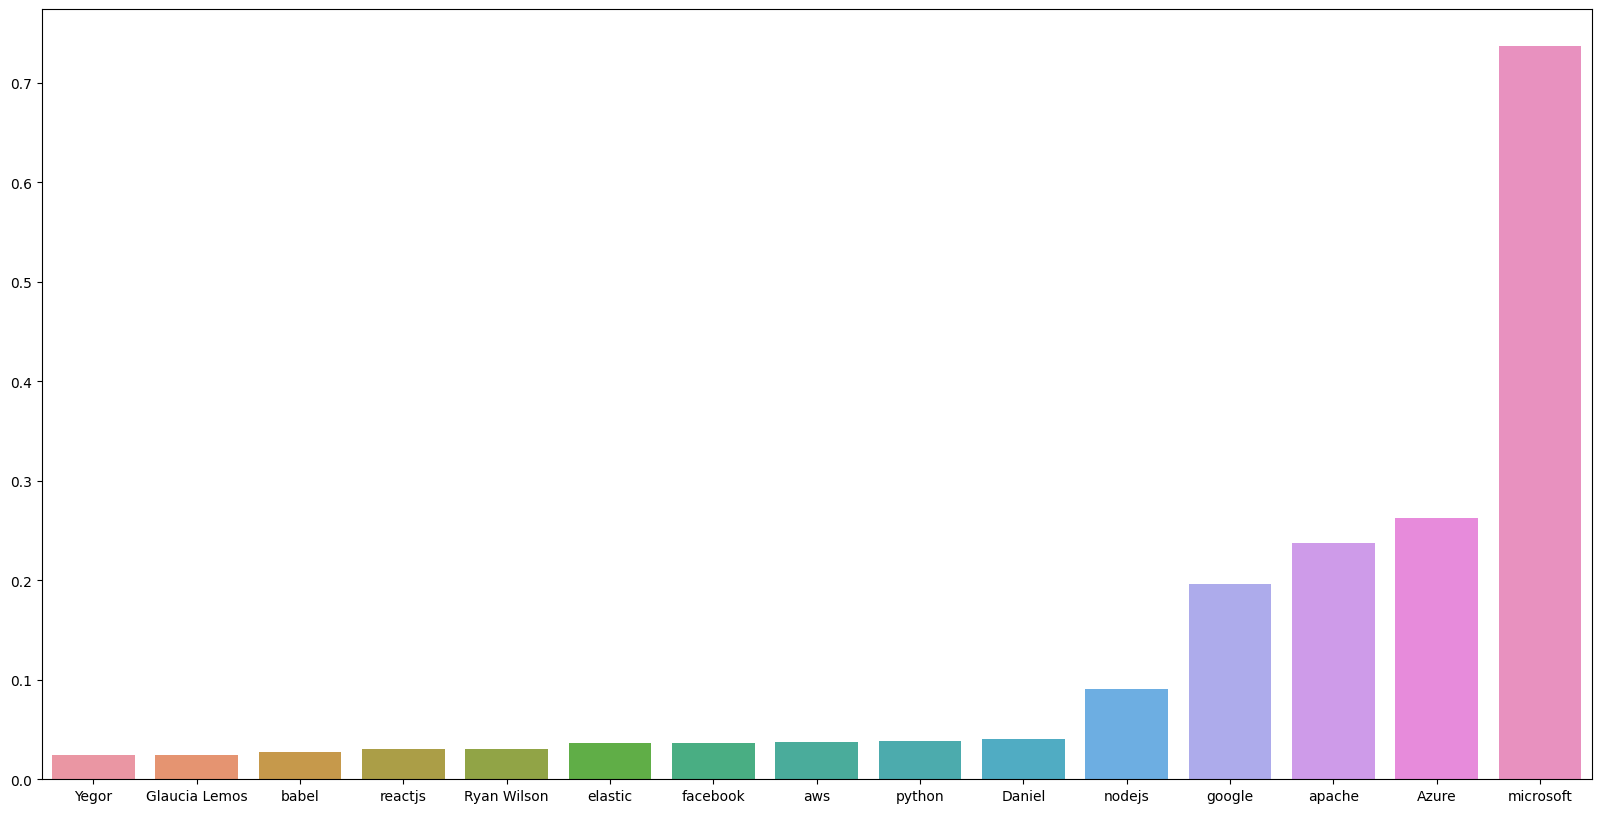

In [ ]:
# Mostra in un grafico a barre i primi 10 nodi
bet_10 = dict(sorted(bet.items(), key=lambda item: item[1]))
bet_10 = list(bet_10)[-15:]
plt.figure(figsize=(20,10))
sns.barplot(x=bet_10, y=[bet[x] for x in bet_10])


<Axes: ylabel='Count'>

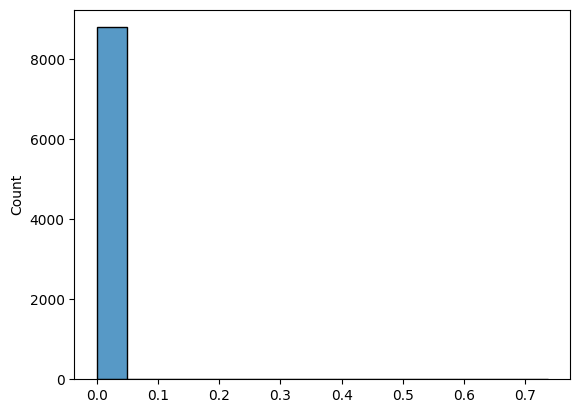

In [ ]:
sns.histplot(data=bet)

## Closeness Centrality

In [ ]:
closen = nx.closeness_centrality(G)

In [ ]:
from statistics import mean
print(mean(closen.values()))

0.26694256887090023


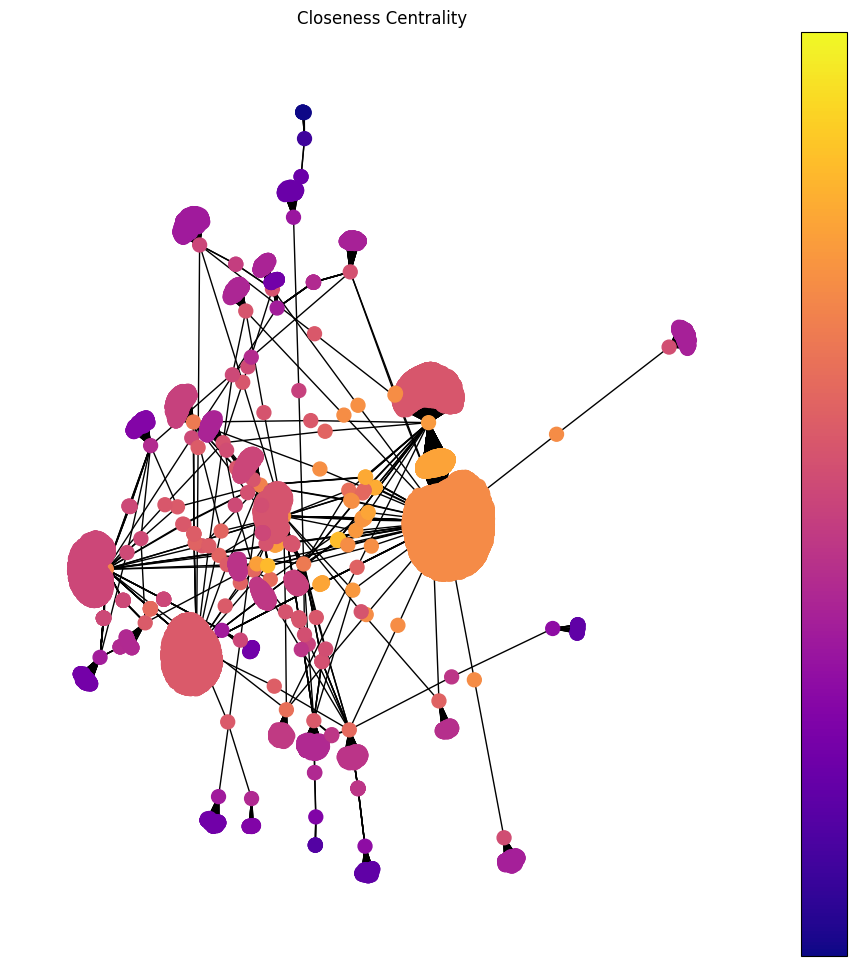

In [ ]:
draw(G, pos, closen, 'Closeness Centrality')

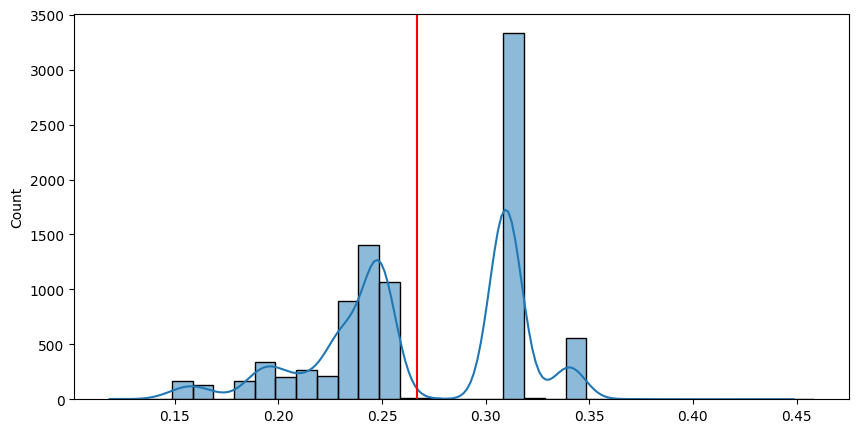

In [ ]:
# Mostra in un grafico a barre i primi 10 nodi
close_10 = dict(sorted(closen.items(), key=lambda item: item[1]))
close_10 = list(close_10)[-15:]
plt.figure(figsize=(10,5))
sns.histplot(data=closen, binwidth=0.01, kde=True)
plt.axvline(x=mean(closen.values()), color='red')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 21016 (\N{CJK UNIFIED IDEOGRAPH-5218}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 23569 (\N{CJK UNIFIED IDEOGRAPH-5C11}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 22766 (\N{CJK UNIFIED IDEOGRAPH-58EE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21016 (\N{CJK UNIFIED IDEOGRAPH-5218}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23569 (\N{CJK UNIFIED IDEOGRAPH-5C11}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: Us

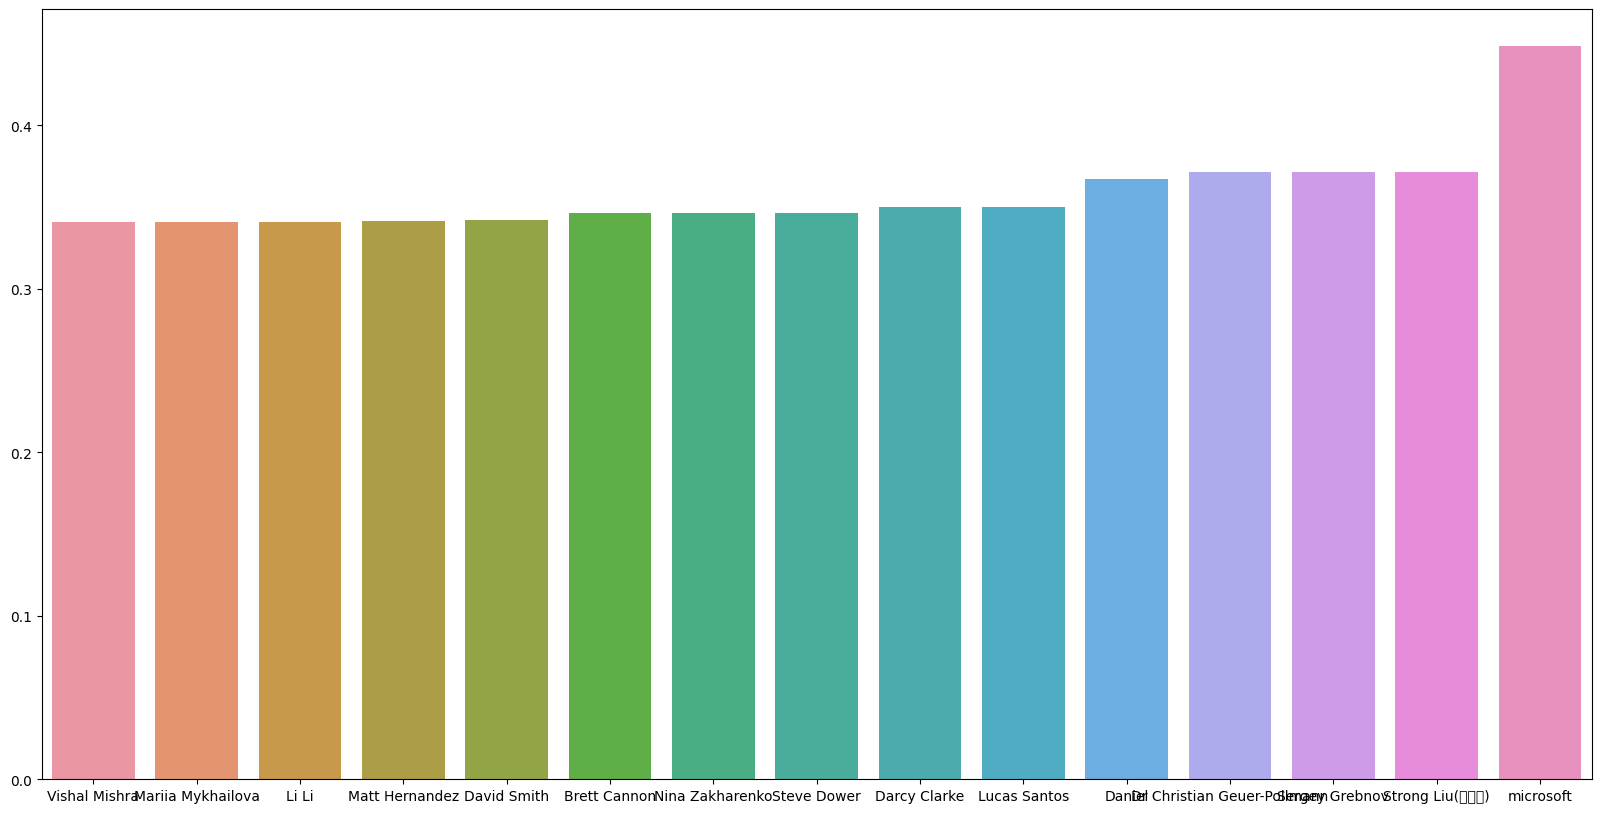

In [ ]:
plt.figure(figsize=(20,10))
bar = sns.barplot(x=close_10, y=[closen[x] for x in close_10])

## Degree Centrality

In [ ]:
degree = nx.degree_centrality(G)

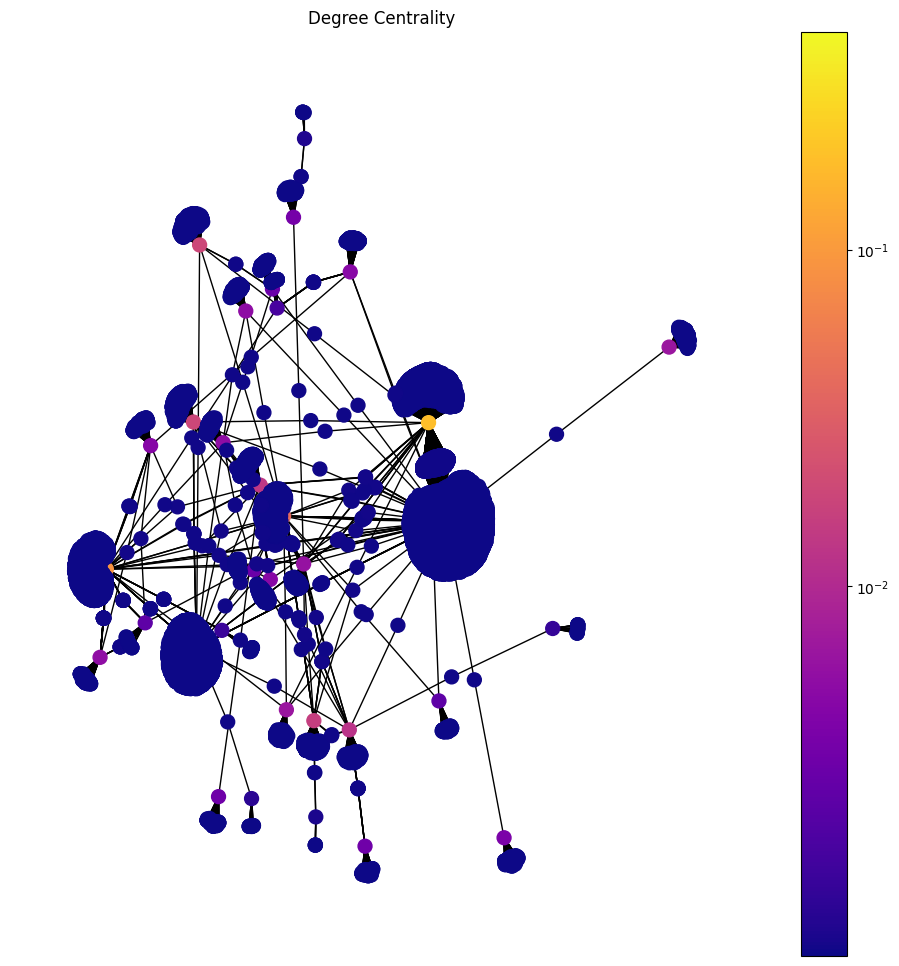

In [ ]:
draw(G, pos, degree, 'Degree Centrality')

<Axes: >

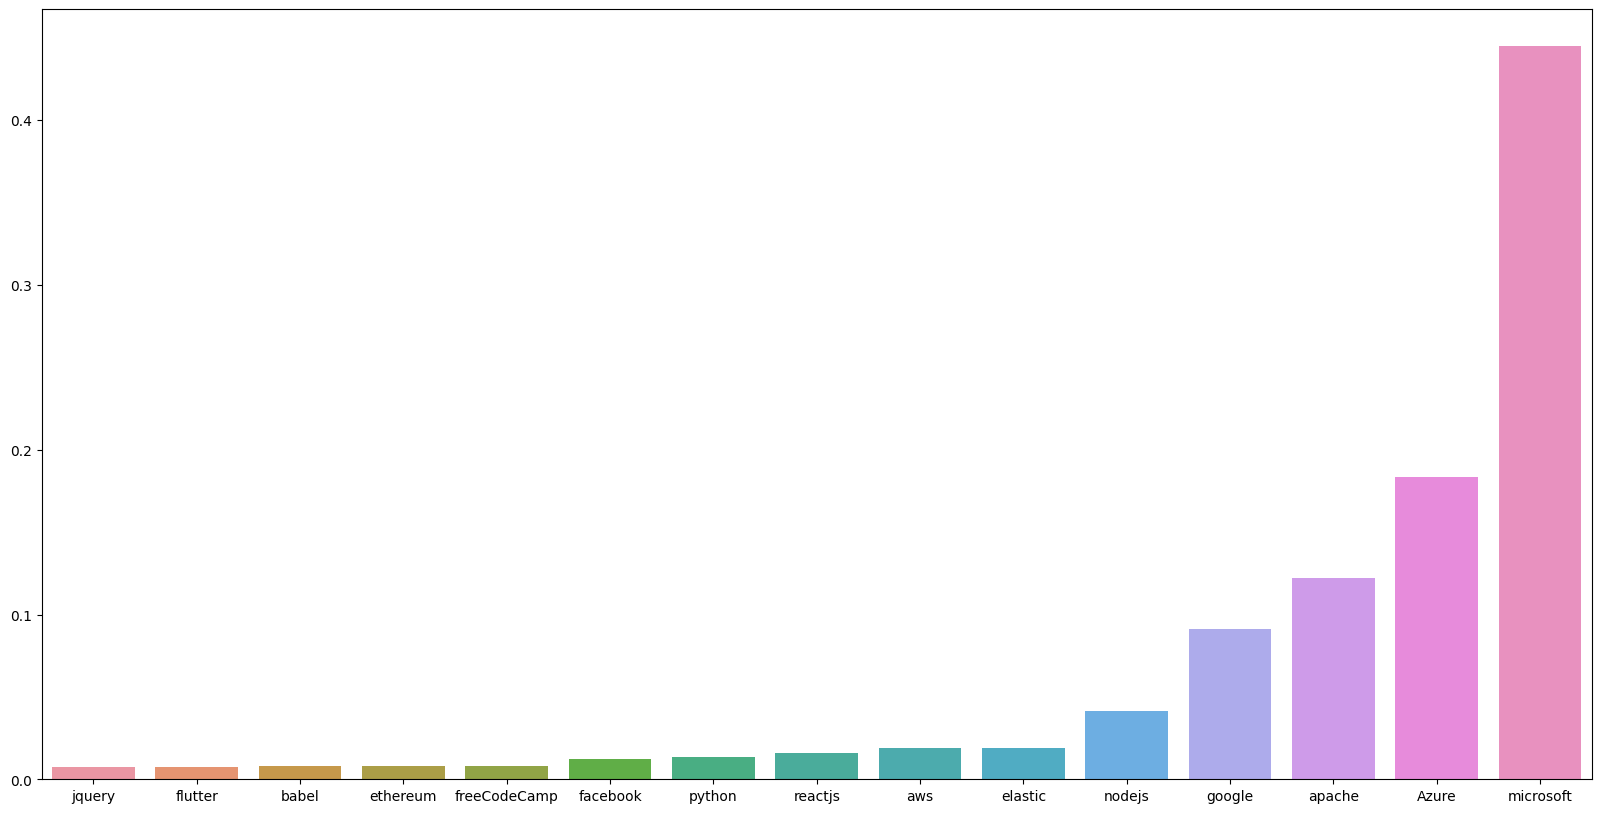

In [ ]:
# Mostra in un grafico a barre i primi 10 nodi
degree_10 = dict(sorted(degree.items(), key=lambda item: item[1]))
degree_10 = list(degree_10)[-15:]
plt.figure(figsize=(20,10))
sns.barplot(x=degree_10, y=[degree[x] for x in degree_10])
sns.histplot(data=degree, binwidth=0.01, kde=True)

## Eigenvector Centrality

In [9]:
eigen=nx.eigenvector_centrality(G, max_iter=100000)

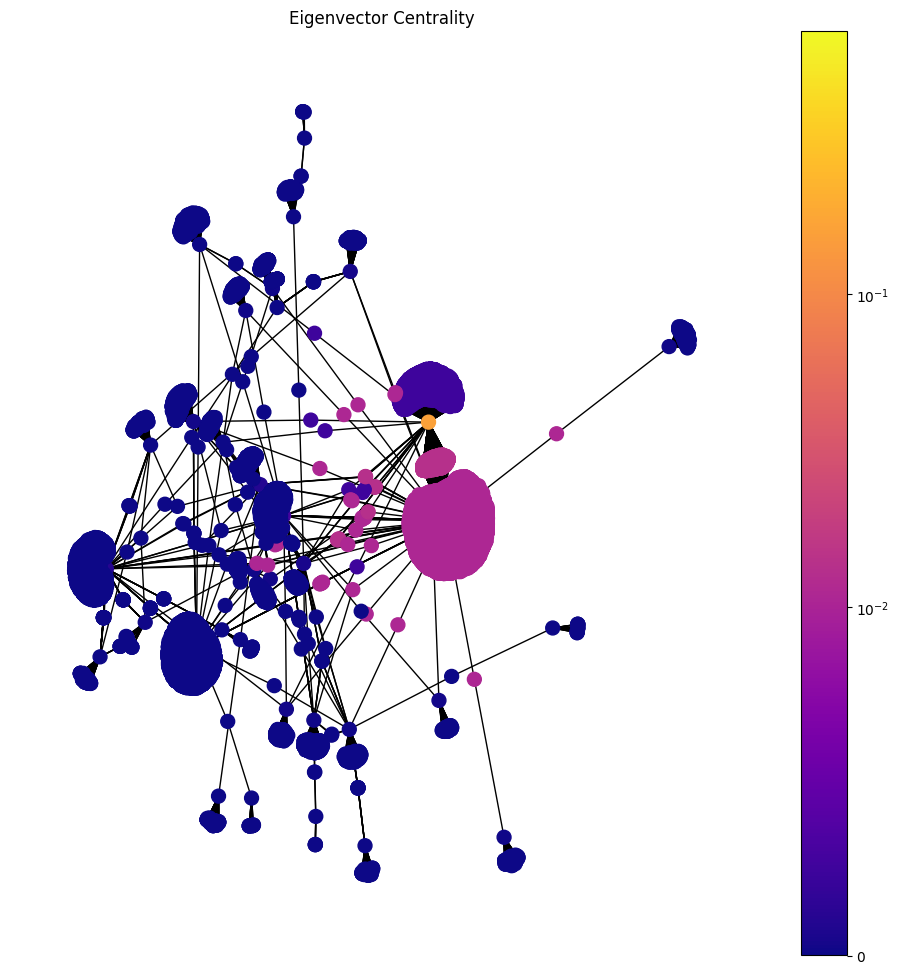

In [11]:
draw(G, pos, eigen, 'Eigenvector Centrality')

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 21016 (\N{CJK UNIFIED IDEOGRAPH-5218}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 23569 (\N{CJK UNIFIED IDEOGRAPH-5C11}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 22766 (\N{CJK UNIFIED IDEOGRAPH-58EE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21016 (\N{CJK UNIFIED IDEOGRAPH-5218}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23569 (\N{CJK UNIFIED IDEOGRAPH-5C11}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: Us

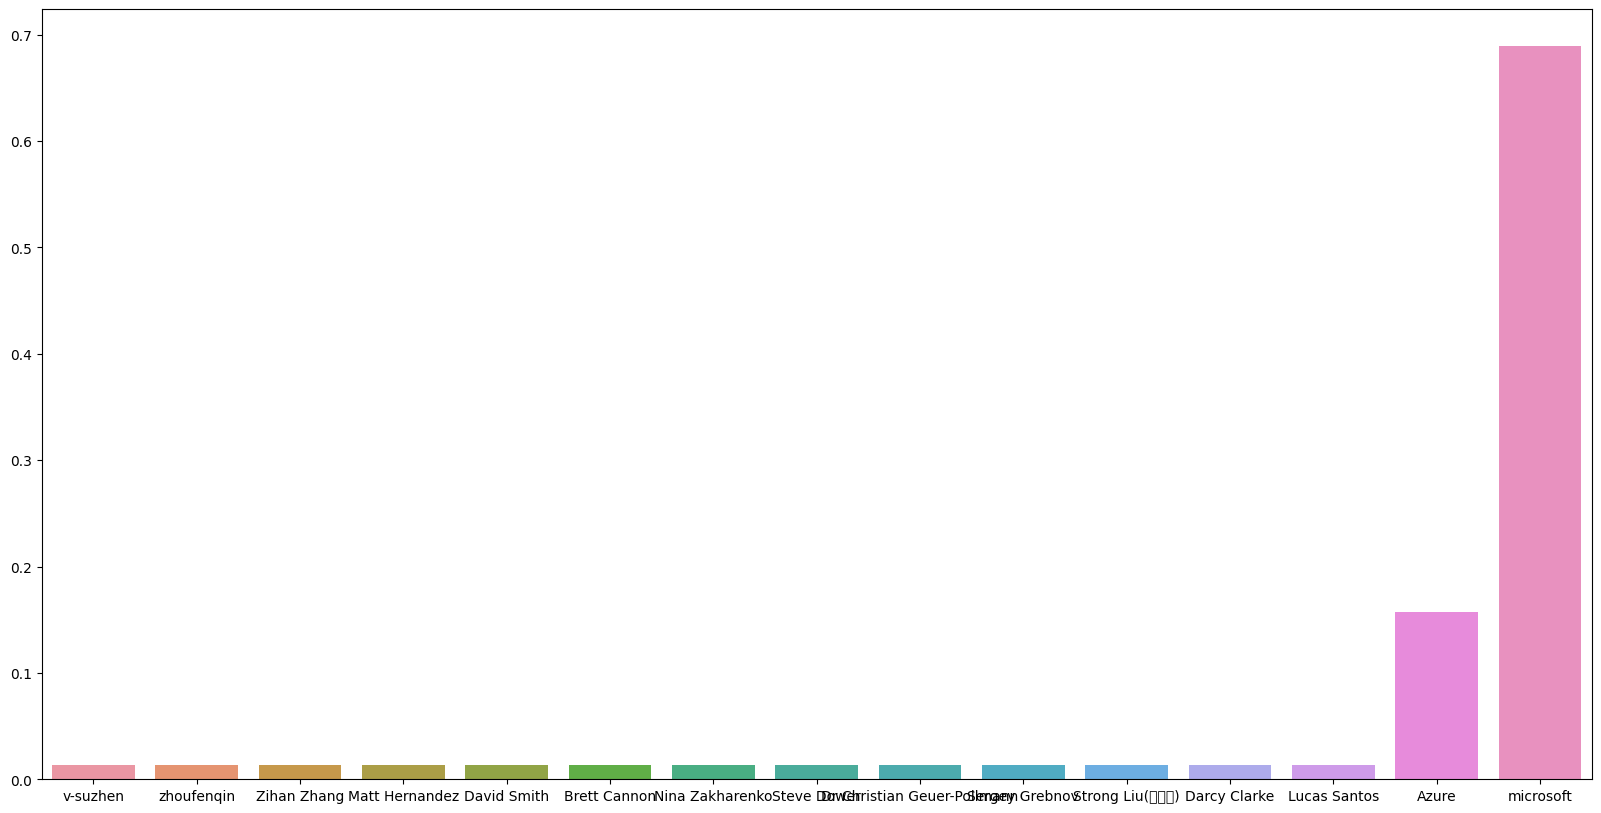

In [10]:
# Mostra in un grafico a barre i primi 10 nodi
eigen_10 = dict(sorted(eigen.items(), key=lambda item: item[1]))
eigen_10 = list(eigen_10)[-15:]
plt.figure(figsize=(20,10))
sns.barplot(x=eigen_10, y=[eigen[x] for x in eigen_10])

# Analisi delle strutture

## Shortest Paths

In [ ]:
company_paths = []
nodes = G.nodes
orgs = df['Organisation'].drop_duplicates()
orgs = [x for x in orgs if x in nodes]
for pair in it.combinations(orgs,2): 
  company_paths.append(nx.shortest_path(G,pair[0],pair[1]))

In [ ]:
path_len = [len(x) for x in company_paths]
data = pd.DataFrame({'paths':company_paths, 'len':path_len})

plt.figure(figsize=(20,10))
sns.countplot(data = data, x = data['len'])
plt.plot()

In [ ]:
max_len=0
max_path=[]

for path in company_paths:
  if len(path)>max_len:
    max_len=len(path)
    max_path=path

path_graph=G.subgraph(max_path)
nx.draw(path_graph, with_labels=True)

In [ ]:
min_len=10
min_path=[]

for path in company_paths:
  if len(path)<min_len:
    min_len=len(path)
    min_path=path

path_graph=G.subgraph(min_path)
nx.draw(path_graph, with_labels=True)

## Ego Network

{'google': Text(0.4562399089336395, 0.8645036220550537, 'google'),
 'apache': Text(-0.7860140800476074, 0.41645732522010803, 'apache'),
 'microsoft': Text(0.12658938765525818, -0.2937238812446594, 'microsoft'),
 'Daniel': Text(-0.07169563323259354, 0.3481682240962982, 'Daniel')}

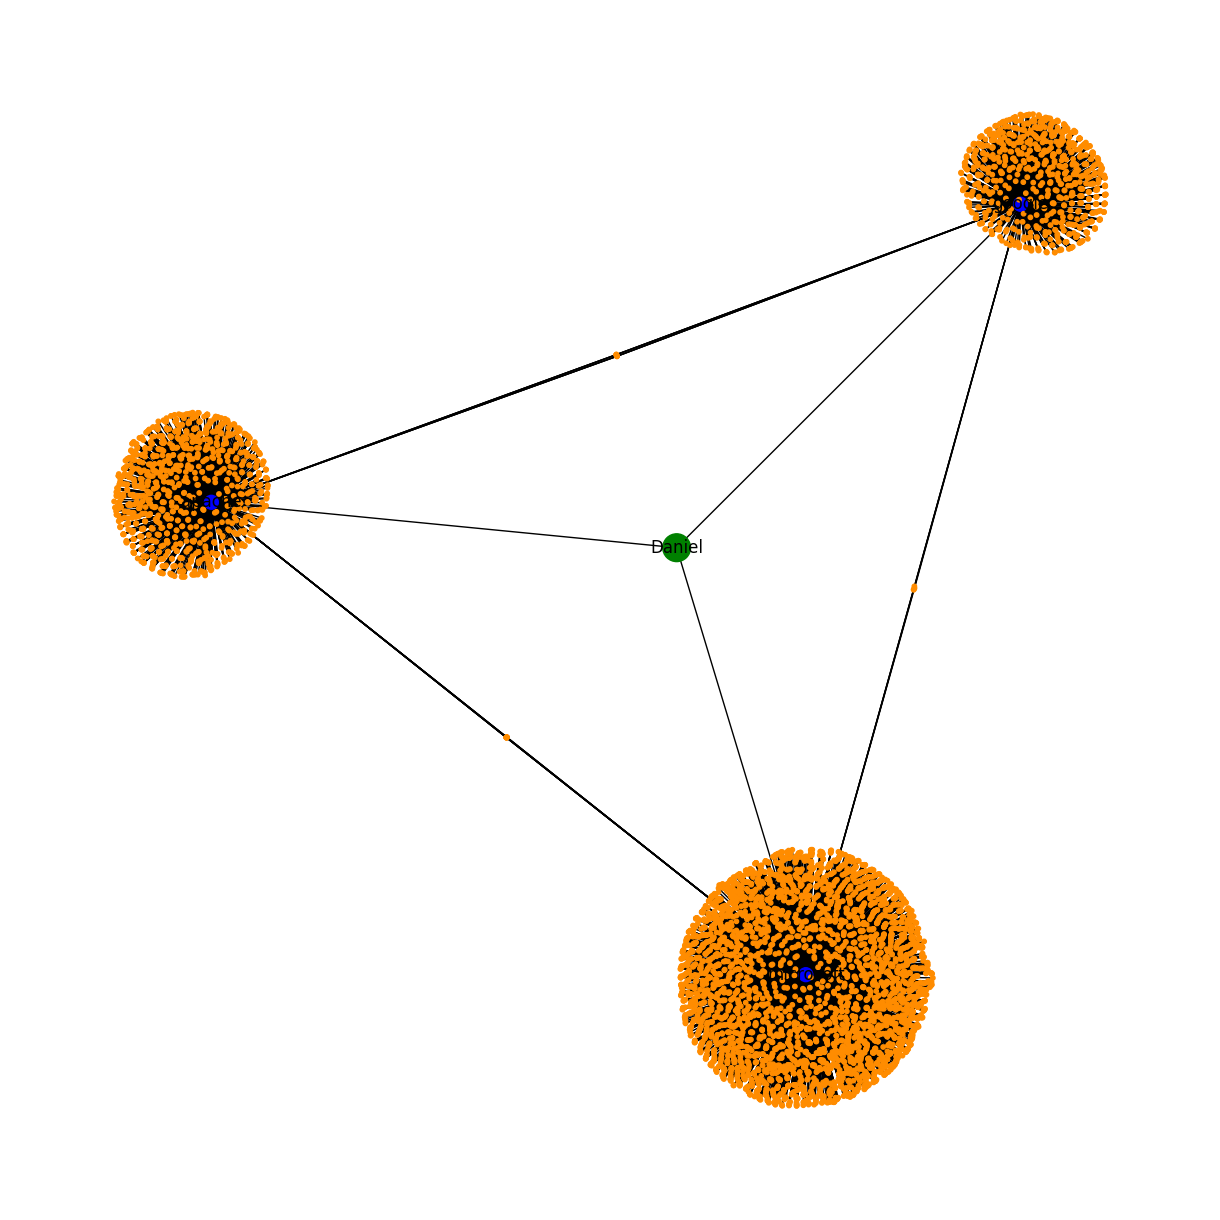

In [21]:
ego_n = nx.ego_graph(G, 'Daniel',radius=2)
#ego_n2 = nx.ego_graph(G, 'Ryan Wilson')
#ego_n3 = nx.ego_graph(G, 'Glaucia Lemos', radius=2)
#ego_n4 = nx.ego_graph(G, 'Yegor')
color_map_ego=[]
node_size_map_ego=[]
labels_map_ego={}
for node in ego_n.nodes:
  if node in set(df['Organisation']):
    color_map_ego.append('blue')
    node_size_map_ego.append(100)
    labels_map_ego[node] = node
  elif node != 'Daniel':
    color_map_ego.append('darkorange')
    node_size_map_ego.append(10)
  else:
      color_map_ego.append('green')
      node_size_map_ego.append(400)
      labels_map_ego[node]=node
plt.figure(figsize=(12,12))
#nx.draw(ego_n)
#nx.draw(ego_n2)
pos_ego=nx.spring_layout(ego_n, seed = seed)
nx.draw(ego_n,pos=pos_ego, node_color= color_map_ego, node_size=node_size_map_ego)
nx.draw_networkx_labels(ego_n, pos=pos_ego, labels=labels_map_ego, color='red')
#nx.draw(ego_n4)

{'google': Text(0.4562399089336395, 0.8645036220550537, 'google'),
 'apache': Text(-0.7860140800476074, 0.41645732522010803, 'apache'),
 'microsoft': Text(0.12658938765525818, -0.2937238812446594, 'microsoft'),
 'Daniel': Text(-0.07169563323259354, 0.3481682240962982, 'Daniel')}

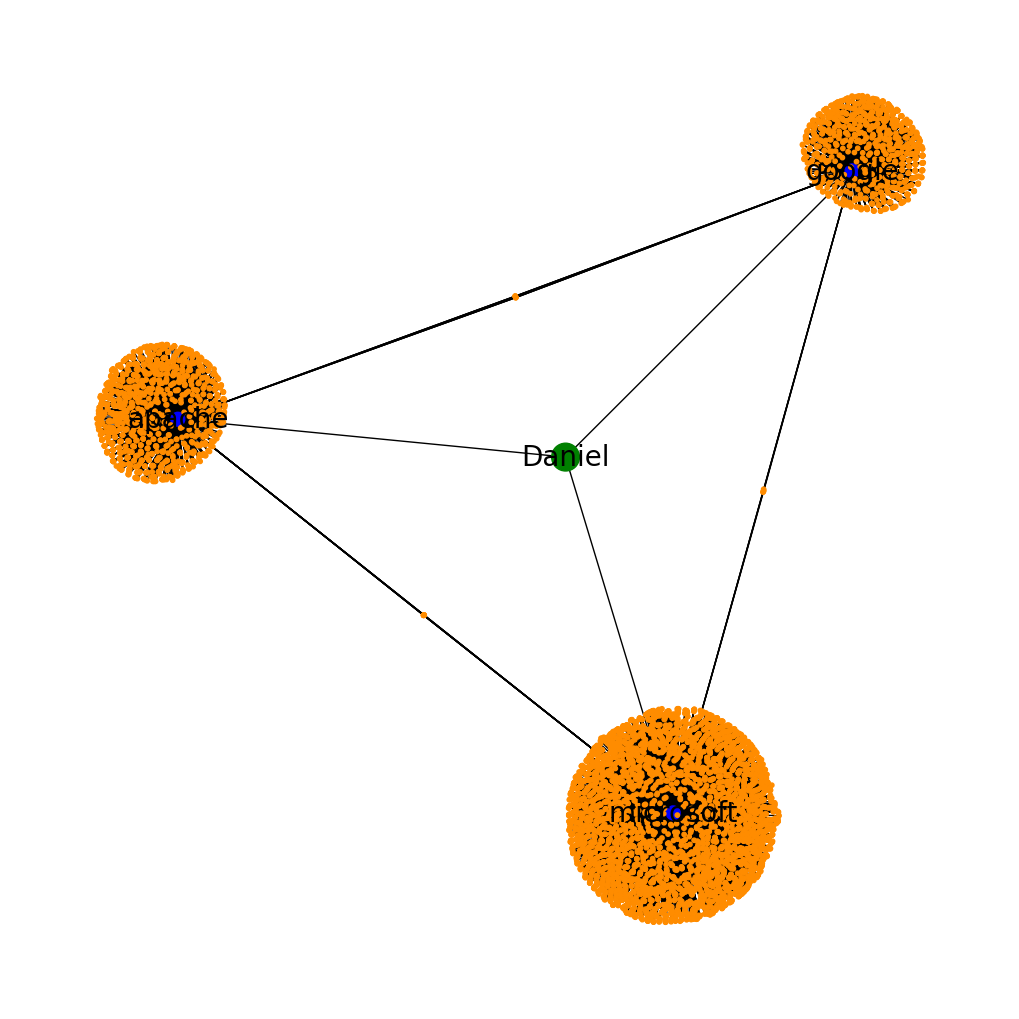

In [28]:
plt.figure(figsize=(10,10))
nx.draw(ego_n,pos=pos_ego, node_color= color_map_ego, node_size=node_size_map_ego)
nx.draw_networkx_labels(ego_n, pos=pos_ego, labels=labels_map_ego, font_size=20)

## Analisi delle Clique

43


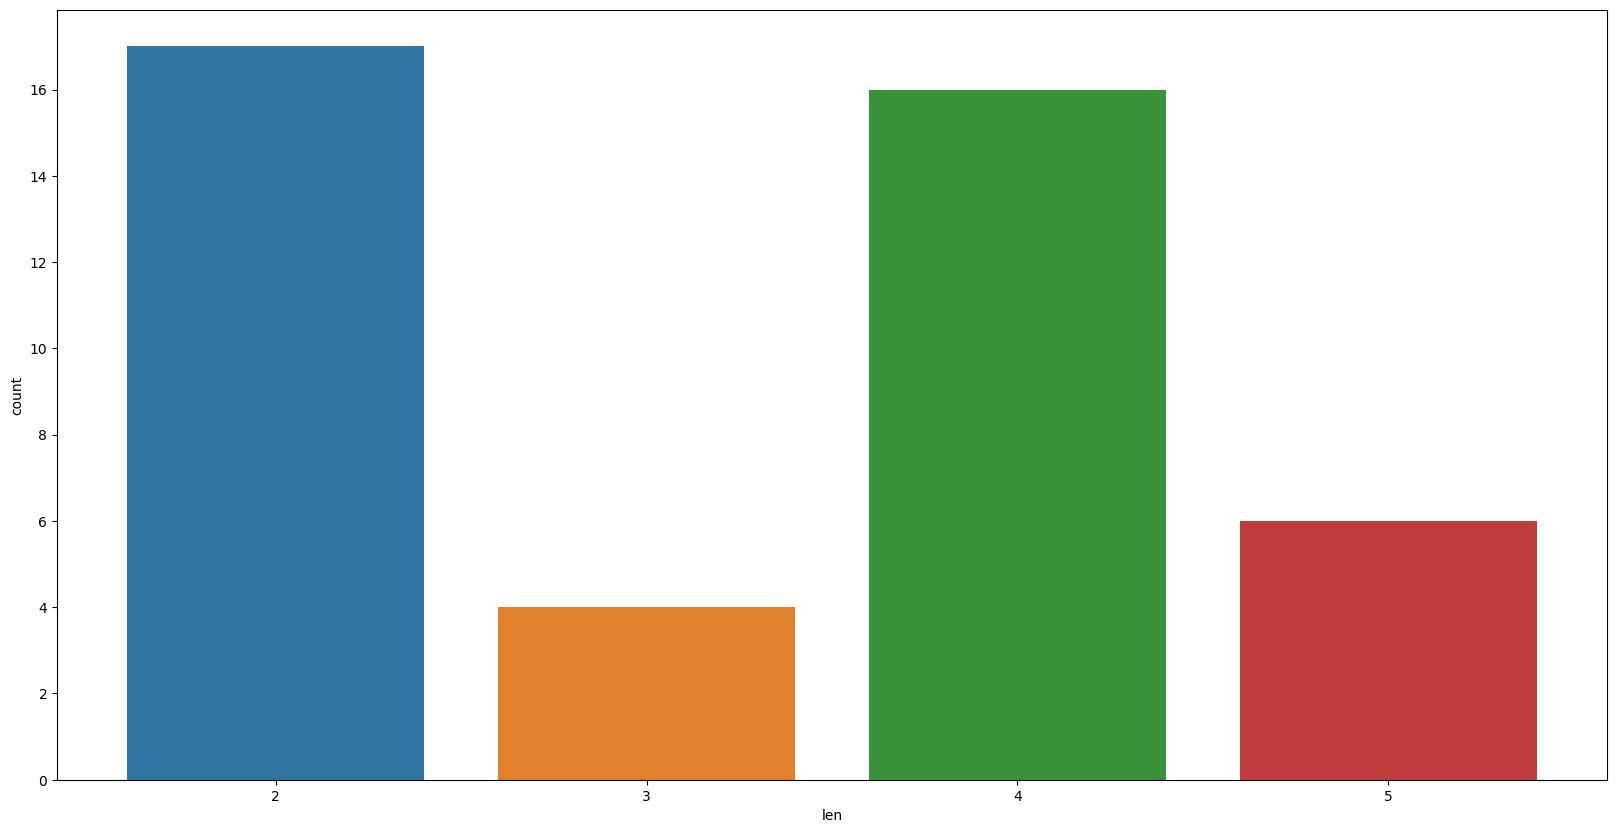

In [5]:
max_cliques = nx.find_cliques(G_company)
max_cliques=list(max_cliques)
clique_len = [len(x) for x in max_cliques]
data = pd.DataFrame({'cliques':max_cliques, 'len':clique_len})
num_of_cliques=sum(1 for _ in max_cliques)
print(num_of_cliques)
plt.figure(figsize=(20,10))
sns.countplot(data = data, x = data['len'])
plt.plot()
cliques_list=[]
for clq in max_cliques:
  if len(clq)>3:
    cliques_list.append(clq)




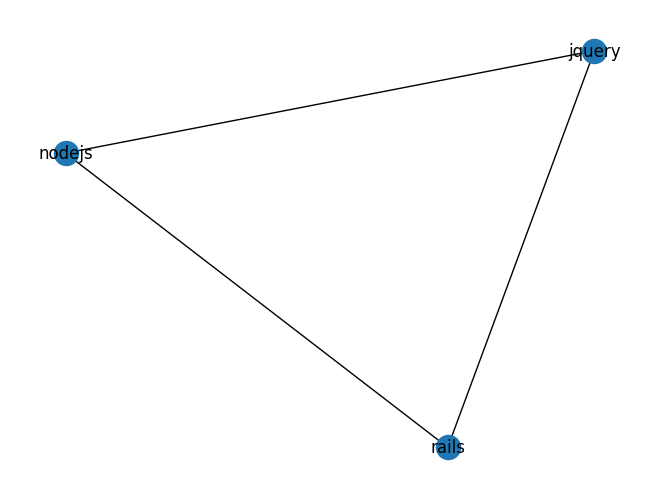

In [6]:
length=3
triad=[]
for clique in max_cliques:
  if len(clique)==length:
    triad=clique
    break

clique_graph=G_company.subgraph(triad)
nx.draw(clique_graph, with_labels=True)

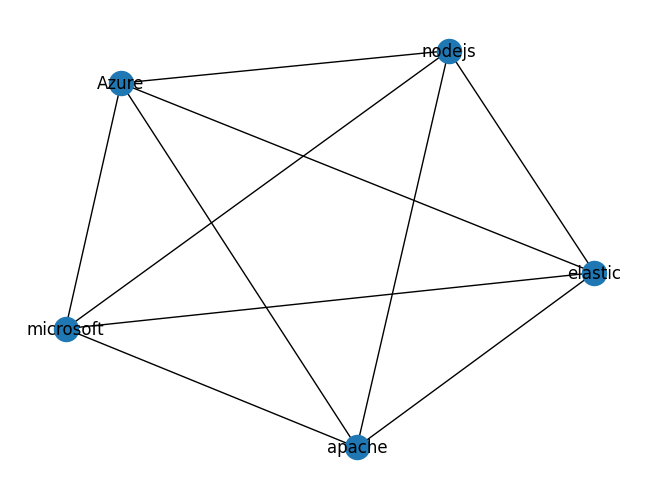

In [7]:
max_len=0
max_clique=[]
for clique in cliques_list:
  if len(clique)>max_len:
    max_len=len(clique)
    max_clique=clique

clique_graph=G_company.subgraph(max_clique)
nx.draw(clique_graph, with_labels=True)

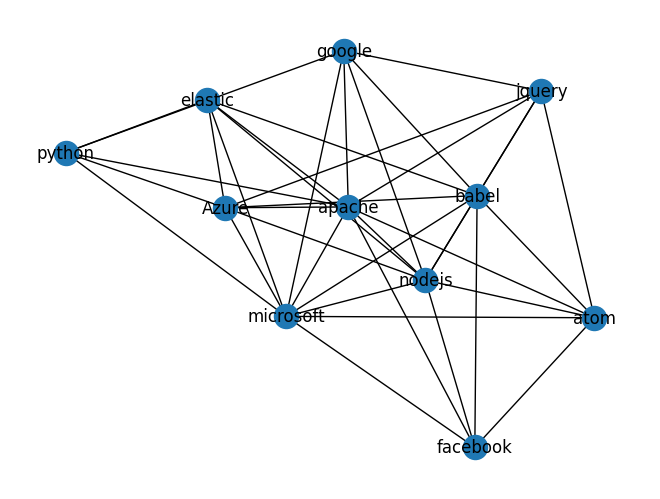

In [3]:
main_core = nx.k_core(G_company)
pos_maincore = nx.spring_layout(main_core, seed=seed)
nx.draw(main_core, with_labels=True, pos=pos_maincore)